# DSC 478 Final Project

### Load Libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib as plt
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

In [2]:
#from google.colab import files
#uploaded = files.upload()

# **Input Variables**:


1.   **age** (numeric)
2.   **job** : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. **marital** : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. **education** (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. **default**: has credit in default? (categorical: 'no','yes','unknown')
6. **housing**: has housing loan? (categorical: 'no','yes','unknown')
7. **loan**: has personal loan? (categorical: 'no','yes','unknown')
8. **contact**: contact communication type (categorical: 'cellular','telephone')
9. **month**: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. **day_of_week**: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. **duration**: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
12. **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. **previous**: number of contacts performed before this campaign and for this client (numeric)
15. **poutcome**: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
16. **emp.var.rate**: employment variation rate - quarterly indicator (numeric)
17. **cons.price.idx**: consumer price index - monthly indicator (numeric)
18. **cons.conf.idx**: consumer confidence index - monthly indicator (numeric)
19. **euribor3m**: euribor 3 month rate - daily indicator (numeric)
20. **nr.employed**: number of employees - quarterly indicator (numeric)


# **Output Variable**
21. **y** - has the client subscribed a term deposit? (binary: 'yes','no')





## Loading in Data

In [3]:
#load data
df = pd.read_csv('bank-additional-full.csv', sep= ';')

In [4]:
df2 = pd.read_csv('bank-additional-full.csv', sep= ';')

In [5]:
#null values input as unknown, replace these with NaN 
df.isin(['unknown']).sum(axis=0)
df = df.replace('unknown',np.NaN)

In [6]:
#now null values are shown 
df.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [7]:
#drop na values
df = df.dropna()


In [8]:
df.isnull().sum()
#no null values found 

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [9]:
#convert categoricals to dummies
df = pd.get_dummies(df)

In [10]:
#drop redudant columns created from dummies
df.drop(['y_no','default_no','housing_no','loan_no'],axis=1,inplace=True)

In [11]:
df.describe(include ='all')

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_yes
count,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,...,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000
mean,39.030012,259.484092,2.521451,956.332295,0.194273,-0.071510,93.523311,-40.602263,3.459938,5160.813409,...,0.016236,0.188074,0.205950,0.209755,0.195323,0.200899,0.113520,0.847415,0.039065,0.126574
std,10.333529,261.714262,2.720150,201.373292,0.522788,1.610399,0.585374,4.789249,1.777231,75.158065,...,0.126384,0.390778,0.404401,0.407140,0.396455,0.400679,0.317233,0.359593,0.193752,0.332501
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.313000,5099.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,37.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.856000,5191.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,45.000000,321.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,95.000000,4918.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Creating Datasets for Analysis

In [12]:
#split X matrix and y vector
y = df['y_yes']
X = df.drop(['y_yes','duration'], axis = 1)

In [13]:
#view the X matrix
X

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
6,59,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,1,0,0,0,0,0,1,0
41184,46,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,1,0,0,0,0,0,1,0
41185,56,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,1,0,0,0,0,0,1,0
41186,44,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,1,0,0,0,0,0,1,0


In [14]:
#view target variable counts
y.value_counts()

0    26629
1     3859
Name: y_yes, dtype: int64

### Standard Dataset

In [15]:
#train test split using stratify due to heavy class imbalance in the predictor variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 54321469, stratify= y)

### Min-Max Scaled Dataset

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_mm = scaler.fit_transform(X_train)
X_test_mm = scaler.fit_transform(X_test)

### PCA Transformed Dataset

In [17]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [18]:
pca.explained_variance_ratio_.cumsum() #2 components

array([0.89394723, 0.99694171, 0.9992457 , 0.99972189, 0.99987804,
       0.99989999, 0.99990971, 0.99991754, 0.99992458, 0.99993091,
       0.99993682, 0.99994214, 0.99994717, 0.99995173, 0.99995621,
       0.9999605 , 0.99996472, 0.9999688 , 0.99997213, 0.9999752 ,
       0.99997809, 0.99998092, 0.99998348, 0.99998569, 0.99998745,
       0.99998903, 0.99999051, 0.99999186, 0.99999289, 0.99999389,
       0.99999486, 0.99999562, 0.99999628, 0.99999687, 0.99999743,
       0.99999792, 0.9999984 , 0.99999879, 0.99999918, 0.99999949,
       0.99999971, 0.99999983, 0.99999994, 0.99999999, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        ])

In [19]:
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

## Exploratory Data Analysis

In [ ]:
#box plot for numeric features nbhj
%matplotlib inline
df2.boxplot(column=['age'])
df2.boxplot(column=['duration'])
df2.boxplot(column=['campaign'])
df2.boxplot(column=['pdays'])
df2.boxplot(column=['previous'])
df2.boxplot(column=['emp.var.rate'])
df2.boxplot(column=['cons.price.idx'])
df2.boxplot(column=['cons.conf.idx'])
df2.boxplot(column=['euribor3m'])
df2.boxplot(column=['nr.employed'])
#comment which are not necessary.
 

In [ ]:
#Correlation
X.corr()

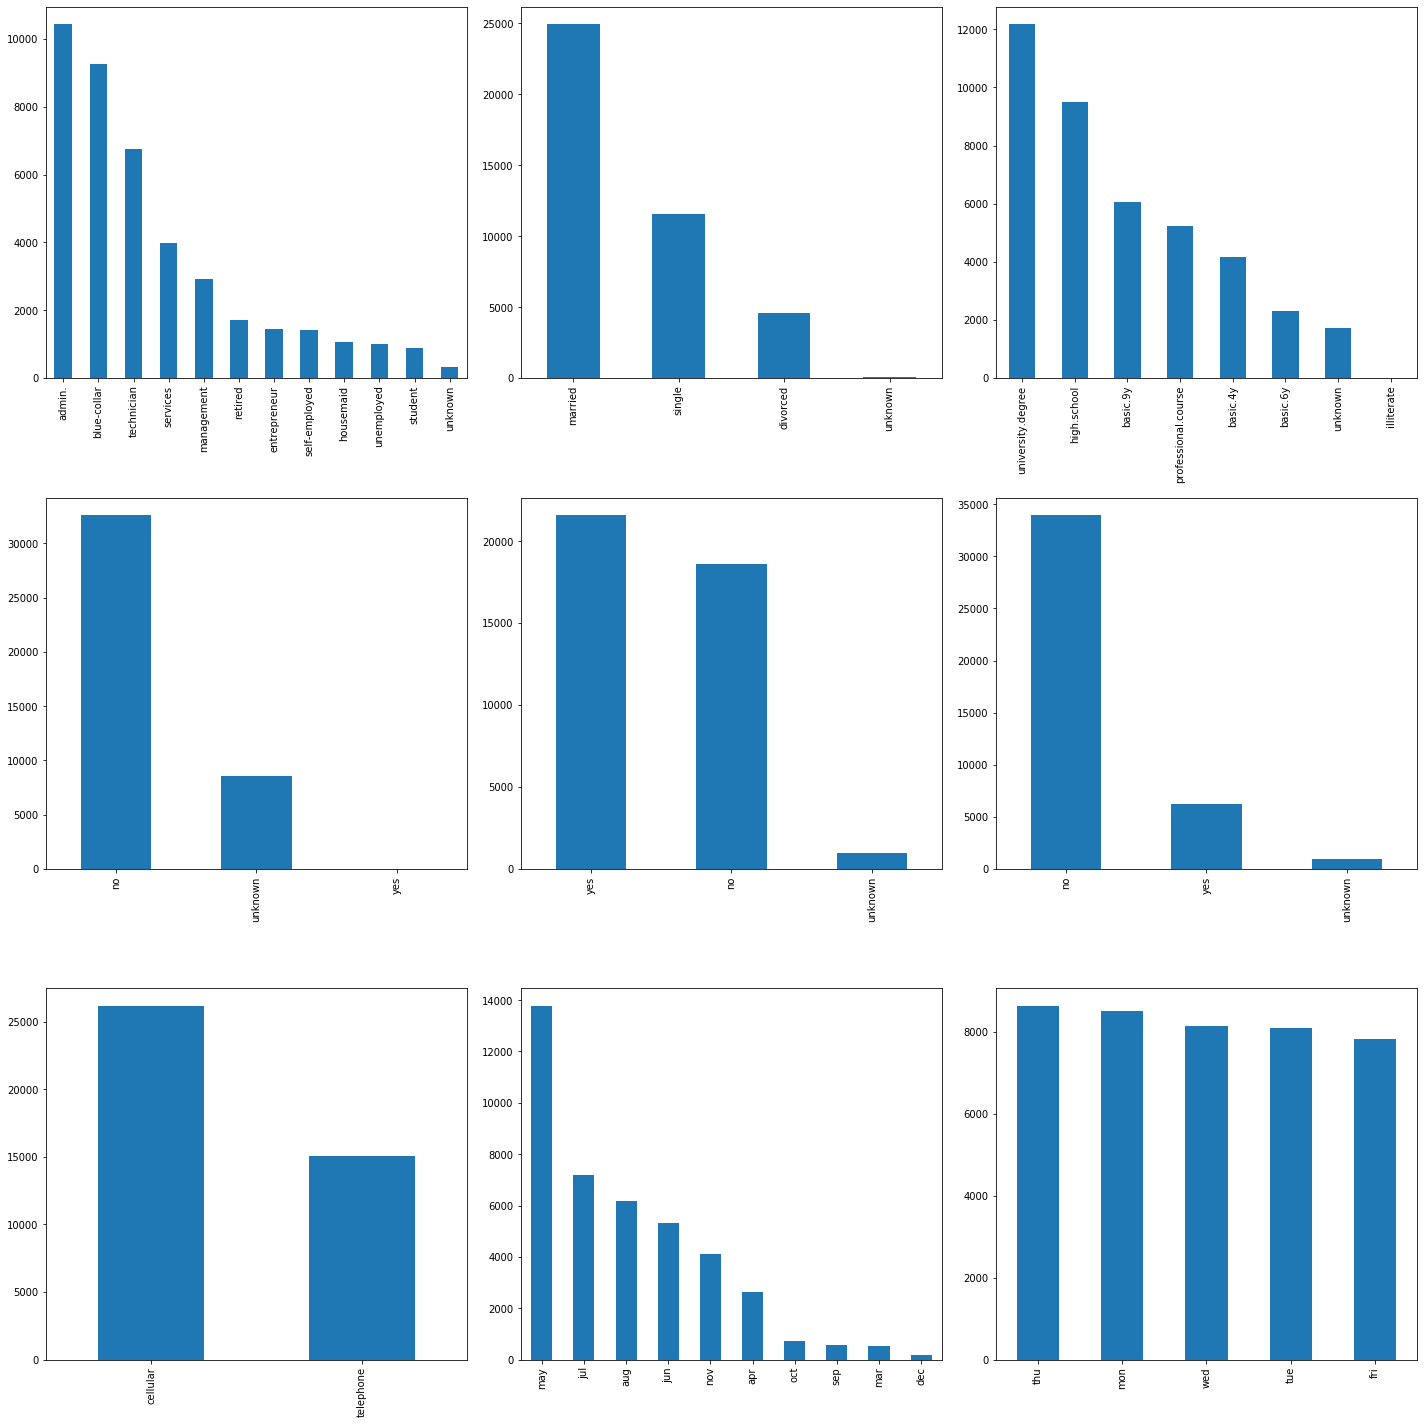

In [37]:
#import libraries again and run below to get barcharts.
fig , axarr = plt.subplots(3,3, figsize= (20,20))
df2['job'].value_counts().plot.bar(ax = axarr[0][0])
df2['marital'].value_counts().plot.bar(ax = axarr[0][1])
df2['education'].value_counts().plot.bar(ax = axarr[0][2])
df2['default'].value_counts().plot.bar(ax = axarr[1][0])
df2['housing'].value_counts().plot.bar(ax = axarr[1][1])
df2['loan'].value_counts().plot.bar(ax = axarr[1][2])
df2['contact'].value_counts().plot.bar(ax = axarr[2][0])
df2['month'].value_counts().plot.bar(ax = axarr[2][1])
df2['day_of_week'].value_counts().plot.bar(ax = axarr[2][2])
fig.tight_layout(pad=1.5)

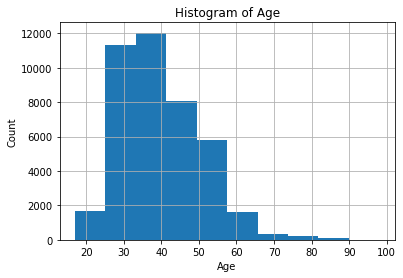

In [38]:
#age Histogram
plt.hist(df2["age"], bins =10, alpha= 1)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age')
plt.grid(True)

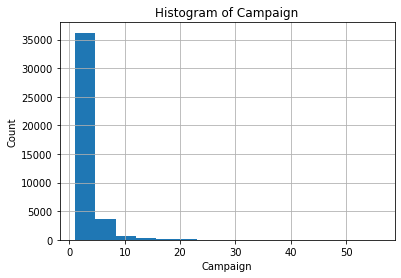

In [39]:
#Campaign Histogram
plt.hist(df2["campaign"], bins =15, alpha= 1)
plt.xlabel('Campaign')
plt.ylabel('Count')
plt.title('Histogram of Campaign')
plt.grid(True)

In [41]:
#Poutcome for education
edu_outcome = pd.crosstab(df2["education"],df2["y"])
edu_outcome


y,no,yes
education,,
basic.4y,3748,428
basic.6y,2104,188
basic.9y,5572,473
high.school,8484,1031
illiterate,14,4
professional.course,4648,595
university.degree,10498,1670
unknown,1480,251


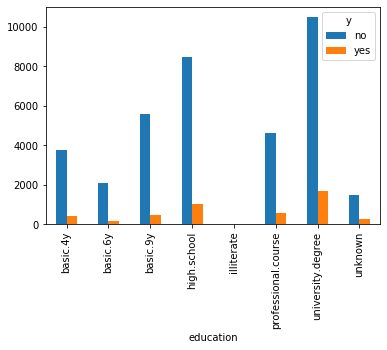

In [46]:
plt.show(edu_outcome.plot(kind="bar"))

In [42]:
#Poutcome for marital
mart_outcome = pd.crosstab(df2["marital"],df2["y"])
mart_outcome



y,no,yes
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


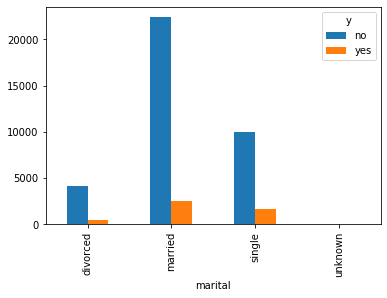

In [43]:
plt.show(mart_outcome.plot(kind="bar"))

In [44]:
#Poutcome for housing
house_outcome = pd.crosstab(df2["housing"],df2["y"])
house_outcome



y,no,yes
housing,,
no,16596,2026
unknown,883,107
yes,19069,2507


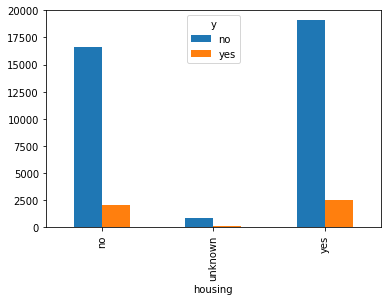

In [45]:
plt.show(house_outcome.plot(kind="bar"))

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = "campaign", data=X)
ax.set_xlabel('Campaign', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
ax.set_title('Campaign Distribution', fontsize = 15)
ax.tick_params(labelsize = 15)
sns.despine

In [ ]:
df_temp = pd.read_csv('bank-additional-full.csv', sep= ';')
mapping = {"yes": 1, "no": 0}
df_temp['y'] = df_temp['y'].replace(mapping).astype(np.float64)
plt.figure(figsize = (15, 12))
plt.style.use('fivethirtyeight')

for i, col in enumerate(df_temp.select_dtypes(np.int64)):
    ax = plt.subplot(4, 2, i + 1)
    # Iterate through the poverty levels
    sns.violinplot(x='y', y=col, data=df_temp);
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel('y'); plt.ylabel(f'{col}')

plt.subplots_adjust(top = 2)

In [ ]:
plt.figure(figsize = (20, 16))
plt.style.use('fivethirtyeight')

for i, col in enumerate(df_temp.select_dtypes(np.float64)):
    ax = plt.subplot(4, 2, i + 1)
    # Iterate through the poverty levels
    sns.violinplot(x='y', y=col, data=df_temp);
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel('y'); plt.ylabel(f'{col}')

plt.subplots_adjust(top = 2)

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(df_temp.corr())
plt.show()

In [ ]:
df_temp['duration'] = df_temp['duration'].apply(lambda n:n/60).round(2)

In [ ]:
durationvscampaign = sns.scatterplot(x='duration', y='campaign',data = df_temp,
                     hue = 'y')

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Number and Duration of Calls')
# Annotation
plt.show()

## Classification Models

### Random Forest (Josh)

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from time import time

In [ ]:
st = time()
params = {
    'max_depth': [1, 2, 3, 4],
    'min_samples_split': [2, 5, 7, 8, 10, 20],
    'n_estimators': [5, 10, 25, 50, 75, 100]

}
cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 0)
rf = RandomForestClassifier()
gs = GridSearchCV(estimator = rf, param_grid = params, scoring = 'f1', cv = cv, n_jobs = -1)
gs.fit(X_train, y_train)
print(time() - st)

In [ ]:
gs.best_params_

In [ ]:
gs.best_estimator_

In [ ]:
rf = gs.best_estimator_.fit(X_train, y_train)
print('Training Metrics - Standard Data')
pred = rf.predict(X_train)
print(metrics.classification_report(y_train, pred))
print("Balanced Accuracy: ", metrics.balanced_accuracy_score(y_train, pred).round(2))
print(pd.DataFrame(metrics.confusion_matrix(y_train, pred)))
print('-'*20)
print('Testing Metrics - Standard Data')
pred = rf.predict(X_test)
print(metrics.classification_report(y_test, pred))
print("Balanced Accuracy: ", metrics.balanced_accuracy_score(y_test, pred).round(2))
print(pd.DataFrame(metrics.confusion_matrix(y_test, pred)))

In [ ]:
rf = gs.best_estimator_.fit(X_train_mm, y_train)
print('Training Metrics - Min Max Scaled Data')
pred = rf.predict(X_train_mm)
print(metrics.classification_report(y_train, pred))
print("Balanced Accuracy: ", metrics.balanced_accuracy_score(y_train, pred).round(2))
print(pd.DataFrame(metrics.confusion_matrix(y_train, pred)))
print('-'*20)
print('Testing Metrics - Min Max Scaled Data')
pred = rf.predict(X_test_mm)
print(metrics.classification_report(y_test, pred))
print("Balanced Accuracy: ", metrics.balanced_accuracy_score(y_test, pred).round(2))
print(pd.DataFrame(metrics.confusion_matrix(y_test, pred)))

In [ ]:
rf = gs.best_estimator_.fit(X_train_pca, y_train)
print('Training Metrics - PCA Data')
pred = rf.predict(X_train_pca)
print(metrics.classification_report(y_train, pred))
print("Balanced Accuracy: ", metrics.balanced_accuracy_score(y_train, pred).round(2))
print(pd.DataFrame(metrics.confusion_matrix(y_train, pred)))
print('-'*20)
print('Testing Metrics - PCA Data')
pred = rf.predict(X_test_pca)
print(metrics.classification_report(y_test, pred))
print("Balanced Accuracy: ", metrics.balanced_accuracy_score(y_test, pred).round(2))
print(pd.DataFrame(metrics.confusion_matrix(y_test, pred)))

The code used below comes from a third party source. It is a function used to visualize the importance of variables in a random forest classification. A link to an article discussing this function is provided [here](https://www.analyseup.com/learn-python-for-data-science/python-random-forest-feature-importance-plot.html). 

In [ ]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

In [ ]:
#first I need to compile the information to be plotted
feature_names = X.columns.values.tolist() #this will allow me to use feature names as the index
featImp = pd.Series(gs.best_estimator_.feature_importances_, index = feature_names)
featImp = featImp.sort_values(ascending=False)
vImp = featImp.head(10) #only taking the first 10 rows because there are many features
vImp #this is the resulting series

In [ ]:
plot_feature_importance(vImp, vImp.index.tolist(), 'RANDOM FOREST CLASSIFICATION ') #plotting the results

### KNN (John) 


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from time import time

params = {
        'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
        'weights': ['uniform','distance'],
        'metric':['euclidean','manhattan']
    
}

cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 0)
clf = KNeighborsClassifier()
gs = GridSearchCV(estimator = clf, param_grid = params, scoring = 'f1', cv = cv, n_jobs = -1)

gs.fit(X_train,y_train)

print(time()-st)

In [ ]:
gs.best_estimator_
#best estimator has k = 3 , and distance = manhattan

### Logistic Regression (Meet)

In [32]:

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from time import time
import seaborn as sns

st = time()
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)

logreg_cv.fit(X_train, y_train)
print(time() - st)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterat

KeyboardInterrupt: 

In [47]:
model1 = logreg_cv.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

Training Metrics - Standard Data
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     21303
           1       0.68      0.23      0.34      3087

    accuracy                           0.89     24390
   macro avg       0.79      0.61      0.64     24390
weighted avg       0.87      0.89      0.86     24390

Balanced Accuracy:  0.61
       0    1
0  20972  331
1   2380  707
--------------------
Testing Metrics - Standard Data
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      5326
           1       0.69      0.24      0.36       772

    accuracy                           0.89      6098
   macro avg       0.79      0.61      0.65      6098
weighted avg       0.87      0.89      0.87      6098

Balanced Accuracy:  0.61
      0    1
0  5241   85
1   587  185


Text(0.5, 15.0, 'Predicted')

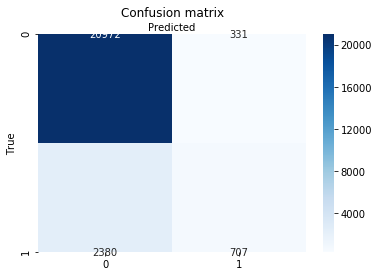

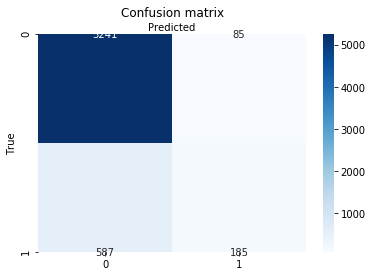

In [31]:
print('Training Metrics - Standard Data')
pred = model1.predict(X_train)
print(metrics.classification_report(y_train, pred))
print("Balanced Accuracy: ", metrics.balanced_accuracy_score(y_train, pred).round(2))
print(pd.DataFrame(metrics.confusion_matrix(y_train, pred)))
print('-'*20)
cnf_matrix_train = metrics.confusion_matrix(y_train, pred)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_train), annot=True, cmap='Blues', fmt='d')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')


print('Testing Metrics - Standard Data')
pred = model1.predict(X_test)
print(metrics.classification_report(y_test, pred))
print("Balanced Accuracy: ", metrics.balanced_accuracy_score(y_test, pred).round(2))
print(pd.DataFrame(metrics.confusion_matrix(y_test, pred)))

cnf_matrix_test = metrics.confusion_matrix(y_test, pred)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_test), annot=True, cmap='Blues', fmt='d')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
logreg_cv.fit(X_train, y_train)

plt.xlabel('Predicted')

In [36]:
model1pca = logreg_cv.fit(X_train_pca, y_train)



/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence thi

KeyboardInterrupt: 

In [34]:


model1 = logreg_cv.best_estimator_.fit(X_train_pca, y_train)
print('Training Metrics - PCA Data')
pred = model1.predict(X_train_pca)
print(metrics.classification_report(y_train, pred))
print("Balanced Accuracy: ", metrics.balanced_accuracy_score(y_train, pred).round(2))
print(pd.DataFrame(metrics.confusion_matrix(y_train, pred)))
print('-'*20)


print('Testing Metrics - PCA Data')
pred = model1.predict(X_test_pca)
print(metrics.classification_report(y_test, pred))
print("Balanced Accuracy: ", metrics.balanced_accuracy_score(y_test, pred).round(2))
print(pd.DataFrame(metrics.confusion_matrix(y_test, pred)))




AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

## **Naive** **Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifierCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, make_scorer
scorer = make_scorer(f1_score, greater_is_better=True, average = 'macro')

In [ ]:
import warnings 
from sklearn.exceptions import ConvergenceWarning

# Filter out warnings from models
warnings.filterwarnings('ignore', category = ConvergenceWarning)
warnings.filterwarnings('ignore', category = DeprecationWarning)
warnings.filterwarnings('ignore', category = UserWarning)

# Dataframe to hold results
modelscore = pd.DataFrame(columns = ['model', 'cv_mean', 'cv_std'])

def cv_model(train, train_labels, model, name, modelscore=None):
    """Perform 10 fold cross validation of a model"""
    
    crossvalscore = cross_val_score(model, train, train_labels, cv = 10, scoring=scorer, n_jobs = -1)
    print(f'10 Fold CV Score: {round(crossvalscore.mean(), 5)} with std: {round(crossvalscore.std(), 5)}')
    
    if modelscore is not None:
        modelscore = modelscore.append(pd.DataFrame({'model': name, 
                                                           'cv_mean': crossvalscore.mean(), 
                                                            'cv_std': crossvalscore.std()},
                                                           index = [0]),
                                             ignore_index = True)

        return modelscore

In [ ]:
modelscore = cv_model(X_train, y_train, 
                         GaussianNB(), 'GNB', modelscore)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
gnb= GaussianNB()
gnb.fit(X_train, y_train)
gnbpredictor = gnb.predict(X_test)
gnbprob = gnb.predict(X_test)

from sklearn.model_selection import KFold
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

print(confusion_matrix(y_test, gnbpredictor ))
print(round(accuracy_score(y_test, gnbpredictor),2)*100)
naivebayes = (cross_val_score(gnb, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from time import time

param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

st = time()
gs = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
gs.fit(X_train, y_train)
print(time() - st)


In [ ]:
gs.best_params_

In [ ]:
gs.best_estimator_

In [ ]:
gnb = gs.best_estimator_.fit(X_train, y_train)
print('Training Metrics - Standard Data')
pred = gnb.predict(X_train)
print(metrics.classification_report(y_train, pred))
print("Balanced Accuracy: ", metrics.balanced_accuracy_score(y_train, pred).round(2))
print(pd.DataFrame(metrics.confusion_matrix(y_train, pred)))
print('-'*20)
print('Testing Metrics - Standard Data')
pred = gnb.predict(X_test)
print(metrics.classification_report(y_test, pred))
print("Balanced Accuracy: ", metrics.balanced_accuracy_score(y_test, pred).round(2))
print(pd.DataFrame(metrics.confusion_matrix(y_test, pred)))

# **DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier(criterion='gini') 
decisiontree.fit(X_train, y_train)
decisiontreepred = decisiontree.predict(X_test)

print(confusion_matrix(y_test, decisiontreepred))
print(round(accuracy_score(y_test, decisiontreepred),2)*100)
decisiontreeclassifier = (cross_val_score(decisiontree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

# **Support Vector Machine**

In [ ]:
from sklearn.svm import SVC
svc= SVC(kernel = 'sigmoid')
svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)
print(confusion_matrix(y_test, svcpred))
print(round(accuracy_score(y_test, svcpred),2)*100)
supportvectormachine = (cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

# **Gradient Boost Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gradientboost = GradientBoostingClassifier()
gradientboost.fit(X_train, y_train)
gradientboostpred = gradientboost.predict(X_test)
print(confusion_matrix(y_test, gradientboostpred ))
print(round(accuracy_score(y_test, gradientboostpred),2)*100)
gradientboostclassifier = (cross_val_score(gradientboost, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

In [ ]:
model = pd.DataFrame({
                'Models': ['Gausian Naive Bayes','Decision Tree Classifier', 'Support Vector Machine', 'Gradient Boosting'],
                'Score':  [naivebayes, decisiontreeclassifier, supportvectormachine, gradientboostclassifier]})

model.sort_values(by='Score', ascending=False)